<a href="https://colab.research.google.com/github/rjz46/Cornell-Conversational-Analysis-Toolkit/blob/master/datasets/reddit_coarse_discourse-corpus/example_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and setup

In [1]:
from IPython.display import display as disp
from zipfile import ZipFile
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
import seaborn as sns
import convokit

from collections import defaultdict


# Load corpus

In [2]:
filename = convokit.download("reddit-coarse-discourse-corpus")
reddit_corpus = convokit.Corpus(filename=filename)

# Interesting stats

In [3]:
#@title Show stats

reddit_corpus.print_summary_stats()

Number of Users: 63573
Number of Utterances: 115827
Number of Conversations: 9483


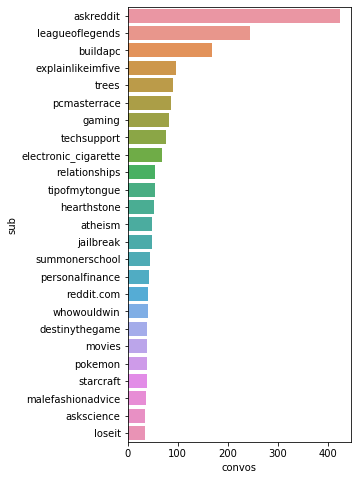

In [4]:
#@title Show most common 25 subreddits
subreddit_counter = collections.Counter()
convos = reddit_corpus.conversations


for convoutt in convos: 
    subrd = convos[convoutt].meta["subreddit"]
    subreddit_counter.update({subrd:1})
top_25_subreddits = dict(subreddit_counter.most_common(25))

plt.figure(figsize=(4, 8))
sns.barplot(
    data=pd.DataFrame.from_dict(top_25_subreddits, orient='index').reset_index().rename(columns={'index':'sub', 0:'convos'}), 
    y='sub', 
    x='convos'
    )

# Upvote distribution

In [5]:
subreddit_ups = collections.defaultdict(list)

for convo in reddit_corpus.iter_conversations():
  subreddit = convo.meta['subreddit']
  for utt in convo.iter_utterances():
    if not utt.meta['ups'] == None:
      subreddit_ups[subreddit].append(utt.meta['ups'])


/kitchen/conda-envs/zissou-env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


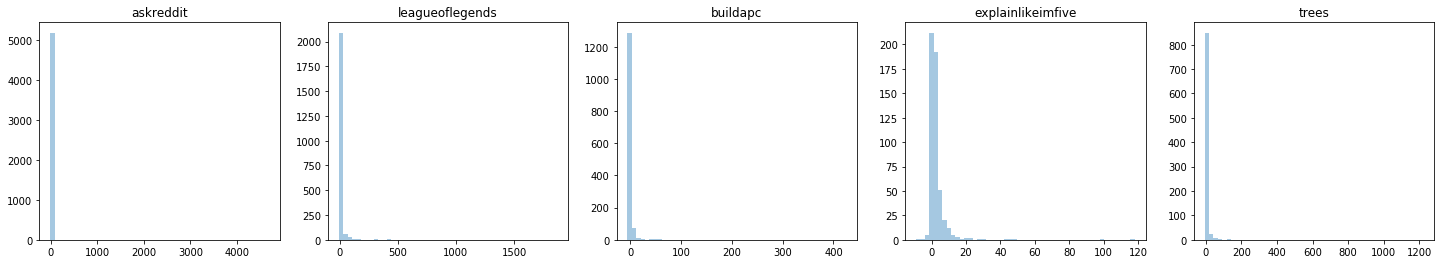

In [6]:
fig, axes = plt.subplots(1,5, figsize=[25,4])
for sub, ax in zip(dict(subreddit_counter.most_common(5)).keys(), axes.flat):
  sns.distplot(subreddit_ups[sub], kde=False, ax=ax)
  ax.set_title(sub)
